# Speaker recognition 

Import Libraries

In [834]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import sklearn.model_selection as sk
import glob
import os
import sounddevice as sd
import librosa
import librosa.display
from scipy.io.wavfile import write
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

from keras.regularizers import l2

Parameters

In [835]:
fs = 44100
no_mfcc=40
max_len=400

Custom dataset

Load files. Extract features

In [863]:
x=[]
y =[]

y1=[]



In [864]:

for file in glob.glob("C:\\Users\\tmacovei001\\Desktop\\Speaker Recognition\\Datasets\\Custom\\All\\*"):
    basename=os.path.basename(file)
    
    person=basename.split("_")[1]   
    emotion=basename.split("_")[3]
    emotion=emotion.split(".")[0]
    

    if(emotion=="neutral" and int(person)!=3):
        y1.append(0)
        file_temp,fs_temp=librosa.load(file, sr=fs)
        #mfcc_features=librosa.feature.melspectrogram(file_temp,sr=fs,  n_mels=128, fmax=8000)
        mfcc_features=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
        #mfcc_features=librosa.feature.chroma_stft(y=file_temp, sr=fs)
        if (max_len > mfcc_features.shape[1]):
            pad_width = max_len - mfcc_features.shape[1]
            mfcc_features = np.pad(mfcc_features, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_features = mfcc_features[:, :max_len]
        x.append(mfcc_features)

    if(emotion=="happy" and int(person)!=3):
        y1.append(1)
        file_temp,fs_temp=librosa.load(file, sr=fs)
        #mfcc_features=librosa.feature.melspectrogram(file_temp,sr=fs,  n_mels=128, fmax=8000)
        mfcc_features=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
        #mfcc_features=librosa.feature.chroma_stft(y=file_temp, sr=fs)
        if (max_len > mfcc_features.shape[1]):
            pad_width = max_len - mfcc_features.shape[1]
            mfcc_features = np.pad(mfcc_features, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_features = mfcc_features[:, :max_len]
        x.append(mfcc_features)
  
    if(emotion=="angry" and int(person)!=3):
        y1.append(2)
        file_temp,fs_temp=librosa.load(file, sr=fs)
        #mfcc_features=librosa.feature.melspectrogram(file_temp,sr=fs,  n_mels=128, fmax=8000)
        mfcc_features=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
        #mfcc_features=librosa.feature.chroma_stft(y=file_temp, sr=fs)
        if (max_len > mfcc_features.shape[1]):
            pad_width = max_len - mfcc_features.shape[1]
            mfcc_features = np.pad(mfcc_features, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_features = mfcc_features[:, :max_len]
        x.append(mfcc_features)
           

RAVDESS Dataset

Load files. Extract features

In [837]:

for file in glob.glob("C:\\Users\\tmacovei001\\Desktop\\Speaker Recognition\\Datasets\\Ravdess\\All\\*"):
    basename=os.path.basename(file)
    
    statement=basename.split("-")[4]
    
    emotion=basename.split("-")[2]
    person=basename.split("-")[6]
    person=person.split(".")[0]
    
    if(int(emotion)==1):
        y1.append(0)
        file_temp,fs_temp=librosa.load(file, sr=fs)
        #mfcc_features=librosa.feature.melspectrogram(file_temp,sr=fs,  n_mels=128, fmax=8000)
        mfcc_features=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
        #mfcc_features=librosa.feature.chroma_stft(y=file_temp, sr=fs)
        if (max_len > mfcc_features.shape[1]):
            pad_width = max_len - mfcc_features.shape[1]
            mfcc_features = np.pad(mfcc_features, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_features = mfcc_features[:, :max_len]
        x.append(mfcc_features)

    elif(int(emotion)==3):
        y1.append(1)
        file_temp,fs_temp=librosa.load(file, sr=fs)
        #mfcc_features=librosa.feature.melspectrogram(file_temp,sr=fs,  n_mels=128, fmax=8000)
        mfcc_features=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
        #mfcc_features=librosa.feature.chroma_stft(y=file_temp, sr=fs)
        if (max_len > mfcc_features.shape[1]):
            pad_width = max_len - mfcc_features.shape[1]
            mfcc_features = np.pad(mfcc_features, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_features = mfcc_features[:, :max_len]
        x.append(mfcc_features)

    elif(int(emotion)==5):
        y1.append(2)
        file_temp,fs_temp=librosa.load(file, sr=fs)
        #mfcc_features=librosa.feature.melspectrogram(file_temp,sr=fs,  n_mels=128, fmax=8000)
        mfcc_features=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
        #mfcc_features=librosa.feature.chroma_stft(y=file_temp, sr=fs)
        if (max_len > mfcc_features.shape[1]):
            pad_width = max_len - mfcc_features.shape[1]
            mfcc_features = np.pad(mfcc_features, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_features = mfcc_features[:, :max_len]
        x.append(mfcc_features)

            

In [865]:
x=np.array(x)
#y1=np.array(y1)A
y1=np.array(y1)
x.shape


(195, 40, 400)

In [839]:
#Note that mfcc operation returns (n_mfcc, time). 
#You have to do an axis permutation to get it to (time, n_mfcc) format. 
#So that the convolution happens on the time dimension.

In [840]:
##Normalize!!

In [841]:
chroma=librosa.feature.chroma_stft(y=file_temp, sr=fs)
chroma.shape

(12, 440)

Model

Model parameters

In [866]:
no_classes=max(y1)+1
nb_filter1=16
nb_filter2=8
nb_filter3=4
no_channels=1
filter_length=3
filter_length2=2
length=39
x_reshape=(x.shape[0],40,x.shape[2],no_channels)
input_shape=(40,x.shape[2],no_channels)


Create model

In [867]:
x = x.reshape(x_reshape)

x_train, x_test, y1_train, y1_test = sk.train_test_split(x,y1,test_size=0.2)
y1_train = tf.keras.utils.to_categorical(y1_train,num_classes=no_classes)
y1_test = tf.keras.utils.to_categorical(y1_test,num_classes=no_classes)

In [868]:
x_train.shape

(156, 40, 400, 1)

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(2, 2), kernel_regularizer=l2(0.001),bias_regularizer=l2(0.001),activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))



model.add(layers.Conv2D(48, kernel_size=(2, 2),kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))




model.add(layers.Flatten())

model.add(layers.Dense(no_classes, activation='softmax'))


In [845]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(2, 2), kernel_regularizer=l2(0.001),bias_regularizer=l2(0.001),activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))



model.add(layers.Conv2D(48, kernel_size=(2, 2),kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))




model.add(layers.Flatten())
#model.add(layers.Dense(400, activation='relu'))
#model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(no_classes, activation='softmax'))

In [846]:
model.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 39, 399, 32)       160       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 19, 199, 32)       0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 19, 199, 32)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 18, 198, 48)       6192      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 9, 99, 48)         0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 9, 99, 48)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 42768)           

Compile model

In [847]:

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


Train model

In [869]:
history = model.fit(x_train, y1_train, epochs=25,verbose=1, validation_data=(x_test,y1_test))

Epoch 1/25
5/5 [==============================] - 1s 269ms/step - loss: 15.8764 - accuracy: 0.3654 - val_loss: 5.6514 - val_accuracy: 0.3077
Epoch 2/25
5/5 [==============================] - 1s 202ms/step - loss: 13.5912 - accuracy: 0.3654 - val_loss: 4.3132 - val_accuracy: 0.3846
Epoch 3/25
5/5 [==============================] - 1s 203ms/step - loss: 9.4867 - accuracy: 0.3974 - val_loss: 3.0022 - val_accuracy: 0.2308
Epoch 4/25
5/5 [==============================] - 1s 228ms/step - loss: 6.2878 - accuracy: 0.5064 - val_loss: 1.6877 - val_accuracy: 0.5128
Epoch 5/25
5/5 [==============================] - 1s 224ms/step - loss: 5.2746 - accuracy: 0.5577 - val_loss: 1.6181 - val_accuracy: 0.6410
Epoch 6/25
5/5 [==============================] - 1s 239ms/step - loss: 3.5763 - accuracy: 0.5769 - val_loss: 1.3787 - val_accuracy: 0.5385
Epoch 7/25
5/5 [==============================] - 1s 215ms/step - loss: 4.4454 - accuracy: 0.5833 - val_loss: 1.4638 - val_accuracy: 0.5897
Epoch 8/25
5/5 [==

## Evaluate model

In [870]:
test_loss, test_acc = model.evaluate(x_test,  y1_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 1.1580 - accuracy: 0.7692

Test accuracy: 0.7692307829856873


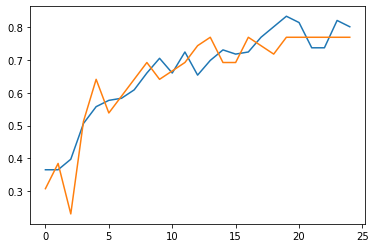

In [871]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

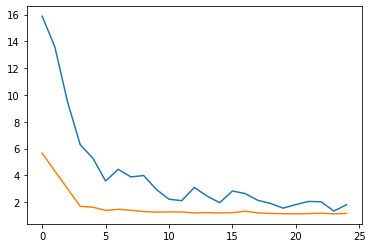

In [872]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


file="C:\\Users\\tmacovei001\\Desktop\\Speaker Recognition\\Datasets\\Ravdess\\Unseen\\03-01-03-01-01-01-09.wav"

file_temp,fs_temp=librosa.load(file, sr=fs)
mfcc_test=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
if (max_len > mfcc_test.shape[1]):
    pad_width = max_len - mfcc_test.shape[1]
    mfcc_test = np.pad(mfcc_test, pad_width=((0, 0), (0, pad_width)), mode='constant')
else:
    mfcc_test = mfcc_test[:, :max_len]

mfcc_test=mfcc_test.reshape((1,40,x.shape[2],no_channels))

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(mfcc_test)

predictions[0]


thisplot = plt.bar(range(2), 100*predictions[0])


plt.show()

In [852]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [873]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

ypred=[]
for i in range(0,len(predictions)):
    ypred.append(np.argmax(predictions[i]))
y_pred=np.array(ypred)    

y_true=np.argmax(y1_test, axis=1)
print(np.array(y_true))
print(ypred)

[1 2 0 1 0 2 0 1 0 2 0 0 1 0 2 0 1 0 2 2 0 0 0 1 2 2 1 0 0 0 0 2 0 2 2 1 0
 1 2]
[1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2]


In [874]:
f1_score(y_true, y_pred, average='micro')

0.7692307692307693

In [875]:
f1_score(y_true, y_pred, average='macro')

0.7264069264069265

In [876]:
precision_score(y_true, y_pred, average='micro')

0.7692307692307693

In [877]:
precision_score(y_true, y_pred, average='macro')

0.7333333333333334

In [878]:
recall_score(y_true, y_pred, average='micro')

0.7692307692307693

In [879]:
recall_score(y_true, y_pred, average='macro')

0.7314814814814815

In [860]:
from sklearn.metrics import confusion_matrix

In [880]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

In [881]:
y_pred = np.argmax(predictions, axis=1)
rounded_labels=np.argmax(y1_test, axis=1)
rounded_labels[1]

cnf_matrix = confusion_matrix(rounded_labels, y_pred)
cnf_matrix

array([[17,  1,  0],
       [ 0,  6,  3],
       [ 0,  5,  7]], dtype=int64)

In [551]:

sns.heatmap(cnf_matrix,annot=True)

NameError: name 'sns' is not defined

In [882]:
model.save('emotion_model')

INFO:tensorflow:Assets written to: emotion_model\assets
